Importing the Pyhton Modules

In [1]:
import numpy as np 
import pandas as pd 
# kl
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
import pandas as pd

import re
import nltk

Reading the data from justice.csv file and dropping the NaN values

In [2]:
df = pd.read_csv('justice.csv', delimiter=',', encoding = "utf8")
df.dropna(inplace=True)
df.head()

,Unnamed: 0,ID,name,href,docket,term,first_party,second_party,facts,facts_len,majority_vote,minority_vote,first_party_winner,decision_type,disposition,issue_area
1,1,50613,Stanley v. Illinois,https://api.oyez.org/cases/1971/70-5014,70-5014,1971,"Peter Stanley, Sr.",Illinois,<p>Joan Stanley had three children with Peter ...,757,5,2,True,majority opinion,reversed/remanded,Civil Rights
2,2,50623,Giglio v. United States,https://api.oyez.org/cases/1971/70-29,70-29,1971,John Giglio,United States,<p>John Giglio was convicted of passing forged...,495,7,0,True,majority opinion,reversed/remanded,Due Process
3,3,50632,Reed v. Reed,https://api.oyez.org/cases/1971/70-4,70-4,1971,Sally Reed,Cecil Reed,"<p>The Idaho Probate Code specified that ""male...",378,7,0,True,majority opinion,reversed/remanded,Civil Rights
4,4,50643,Miller v. California,https://api.oyez.org/cases/1971/70-73,70-73,1971,Marvin Miller,California,"<p>Miller, after conducting a mass mailing cam...",305,5,4,True,majority opinion,vacated/remanded,First Amendment
5,5,50644,Kleindienst v. Mandel,https://api.oyez.org/cases/1971/71-16,71-16,1971,"Richard G. Kleindienst, Attorney General of th...","Ernest E. Mandel, et al.",<p>Ernest E. Mandel was a Belgian professional...,2282,6,3,True,majority opinion,reversed,First Amendment


In [3]:
df_imp = df.copy()
df_imp.head()

,Unnamed: 0,ID,name,href,docket,term,first_party,second_party,facts,facts_len,majority_vote,minority_vote,first_party_winner,decision_type,disposition,issue_area
1,1,50613,Stanley v. Illinois,https://api.oyez.org/cases/1971/70-5014,70-5014,1971,"Peter Stanley, Sr.",Illinois,<p>Joan Stanley had three children with Peter ...,757,5,2,True,majority opinion,reversed/remanded,Civil Rights
2,2,50623,Giglio v. United States,https://api.oyez.org/cases/1971/70-29,70-29,1971,John Giglio,United States,<p>John Giglio was convicted of passing forged...,495,7,0,True,majority opinion,reversed/remanded,Due Process
3,3,50632,Reed v. Reed,https://api.oyez.org/cases/1971/70-4,70-4,1971,Sally Reed,Cecil Reed,"<p>The Idaho Probate Code specified that ""male...",378,7,0,True,majority opinion,reversed/remanded,Civil Rights
4,4,50643,Miller v. California,https://api.oyez.org/cases/1971/70-73,70-73,1971,Marvin Miller,California,"<p>Miller, after conducting a mass mailing cam...",305,5,4,True,majority opinion,vacated/remanded,First Amendment
5,5,50644,Kleindienst v. Mandel,https://api.oyez.org/cases/1971/71-16,71-16,1971,"Richard G. Kleindienst, Attorney General of th...","Ernest E. Mandel, et al.",<p>Ernest E. Mandel was a Belgian professional...,2282,6,3,True,majority opinion,reversed,First Amendment


In [4]:
df_imp.drop(columns=['Unnamed: 0', 'docket','name','first_party','second_party', 
                 'facts_len', 'majority_vote', 'minority_vote', 'href', 'ID','term'], inplace=True)
df_imp.columns

Index(['facts', 'first_party_winner', 'decision_type', 'disposition',
       'issue_area'],
      dtype='object')

Splitting the data across multiple arrays to differentiate between the features to be used for NLP and others to be used for Classification

In [5]:
df_facts = df_imp['facts']
df_cat = df_imp[['decision_type', 'disposition', 'issue_area']]
df_target = df_imp['first_party_winner']

In [6]:
df_cat.reset_index(drop=True, inplace=True)
df_target.reset_index(drop=True, inplace=True)
df_facts.reset_index(drop=True, inplace=True)

In [7]:
label_encoder = preprocessing.LabelEncoder()
df_target= label_encoder.fit_transform(df_target)

In [8]:
df_target = pd.DataFrame(df_target, columns=['first_party_winner'])
df_target

,first_party_winner
0,1
1,1
2,1
3,1
4,1
...,...
3093,1
3094,1
3095,0
3096,1


In [9]:
df_cat_target = pd.concat([df_cat, df_target], axis=1, join='inner')
# df_cat_target

In [10]:
df_facts = pd.DataFrame(df_facts, columns=['facts'])

In [11]:
df_facts['facts'] = df_facts['facts'].str.replace(r'<[^<>]*>', '', regex=True)
# df_facts

In [12]:
corpus = df_facts["facts"]
tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))   

In [13]:
ps = nltk.stem.porter.PorterStemmer()
lem = nltk.stem.wordnet.WordNetLemmatizer()

In [14]:
stopwords = nltk.corpus.stopwords.words("english")
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, stopwords=None):
    # toLowerCase, removing Punctuation and white spaces
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    # Tokenize 
    lst_text = text.split()

    # removing Stopwords
    if stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    stopwords]
                
    # Stemming 
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    # Lemmatisation
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    # returning final String
    text = " ".join(lst_text)
    return text

In [16]:
df_facts["facts_clean"] = df_facts["facts"].apply(lambda x: utils_preprocess_text(x, flg_stemm=True, flg_lemm=True, stopwords=stopwords))

In [17]:
df_facts.iloc[0]

facts          Joan Stanley had three children with Peter Sta...
facts_clean    joan stanley three child peter stanley stanley...
Name: 0, dtype: object

In [18]:
df_facts_target = pd.concat([df_facts,df_target['first_party_winner']],axis=1, join='inner')
df_facts_target.columns

Index(['facts', 'facts_clean', 'first_party_winner'], dtype='object')

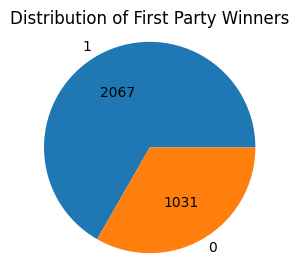

In [93]:
value_counts = df_facts_target["first_party_winner"].value_counts()

import matplotlib.pyplot as plt

plt.figure(figsize=(3, 3)) 
plt.pie(value_counts, labels=value_counts.index, autopct=lambda p: '{:.0f}'.format(p * sum(value_counts) / 100))
plt.title("Distribution of First Party Winners") 
plt.axis('equal')  
plt.show() 

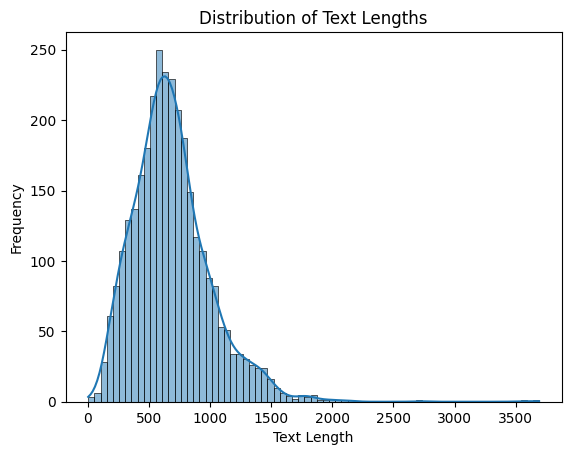

In [94]:
import seaborn as sns

df_facts['text_length'] = df_facts['facts_clean'].apply(len)

sns.histplot(data=df_facts, x='text_length', kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [95]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [96]:
def plot_uni_bi(y):
    corpus = df_facts_target[df_facts_target["first_party_winner"]== y]["facts_clean"]
    lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
    fig.suptitle("Most frequent words", fontsize=15)
    fig.subplots_adjust(hspace=0.5)  

    # Unigrams
    dic_words_freq = nltk.FreqDist(lst_tokens)
    dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                        columns=["Word","Freq"])
    ax[0].barh(dtf_uni["Word"][:10], dtf_uni["Freq"][:10], color='skyblue')
    ax[0].invert_yaxis()
    ax[0].set_title("Unigrams")
    for i, v in enumerate(dtf_uni["Freq"][:10]):
        ax[0].text(v + 3, i, str(v), ha='left', va='center')
    ax[0].set_ylabel("Word")
    ax[0].set_xlabel("Frequency")

    # Bigrams
    dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
    dtf_bi = pd.DataFrame(dic_words_freq.most_common(), 
                        columns=["Word","Freq"])
    dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
                    string for string in x) )
    ax[1].barh(dtf_bi["Word"][:10], dtf_bi["Freq"][:10], color='lightgreen')
    ax[1].invert_yaxis()
    ax[1].set_title("Bigrams")
    for i, v in enumerate(dtf_bi["Freq"][:10]):
        ax[1].text(v + 3, i, str(v), ha='left', va='center')
    ax[1].set_ylabel("Bigram")
    ax[1].set_xlabel("Frequency")

    plt.show()


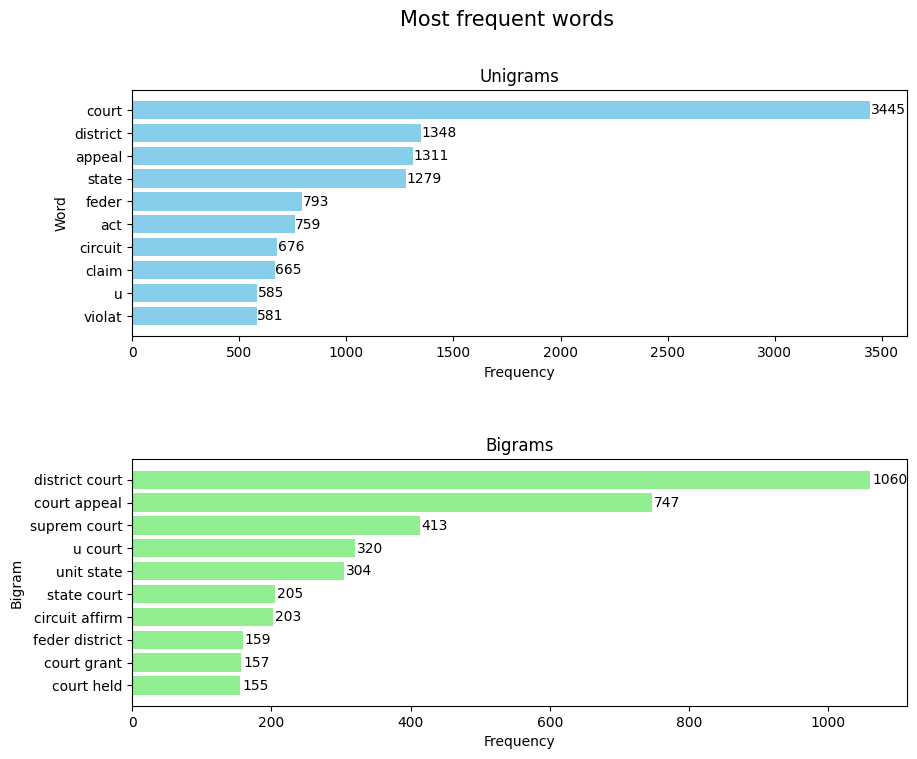

In [97]:
plot_uni_bi(0)

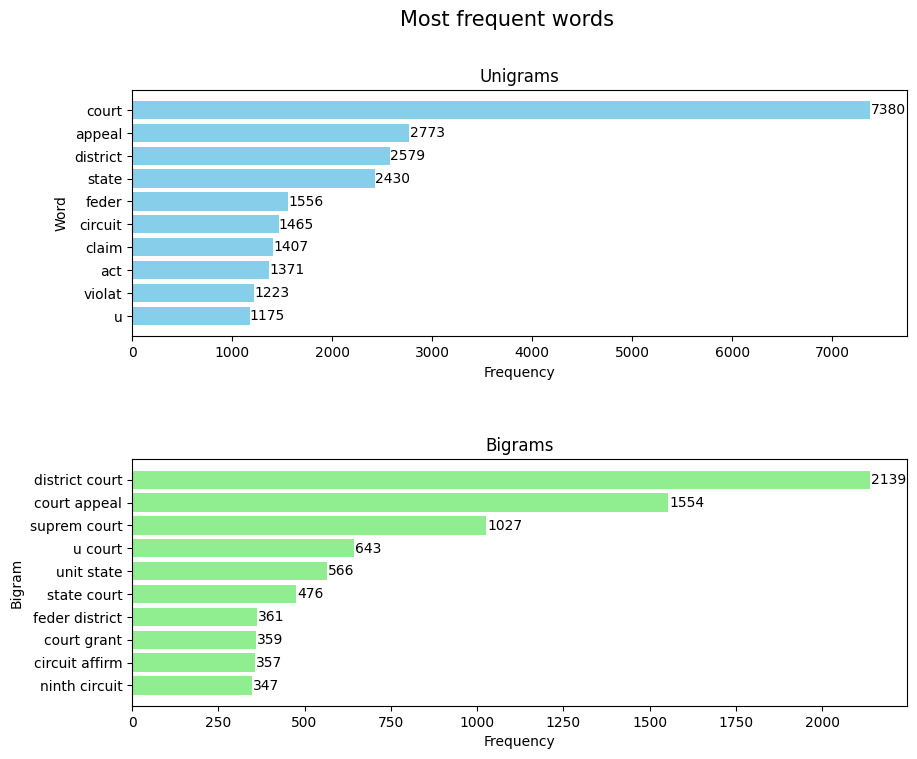

In [98]:
plot_uni_bi(1)

In [19]:
import wordcloud
import gensim.downloader as gensim_api
import gensim
import seaborn as sb

In [20]:
wc = wordcloud.WordCloud(background_color='black', max_words=100, 
                         max_font_size=40)
wc = wc.generate(str(corpus))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

NameError: name 'plt' is not defined

In [27]:
def plot_barplots_lda(y):
    corpus = df_facts_target[df_facts_target["first_party_winner"]==y]["facts_clean"]
    
    lst_corpus = []
    for string in corpus:
        lst_words = string.split()
        lst_grams = [" ".join(lst_words[i:i + 2]) for i in range(0, 
                        len(lst_words), 2)]
        lst_corpus.append(lst_grams)
    id2word = gensim.corpora.Dictionary(lst_corpus)
    dic_corpus = [id2word.doc2bow(word) for word in lst_corpus]
    lda_model = gensim.models.ldamodel.LdaModel(corpus=dic_corpus, id2word=id2word, num_topics=7, random_state=123, update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)
    
    lst_dics = []
    for i in range(0,3):
        lst_tuples = lda_model.get_topic_terms(i)
        for tupla in lst_tuples:
            lst_dics.append({"topic":i, "id":tupla[0], 
                            "word":id2word[tupla[0]], 
                            "weight":tupla[1]})
    dtf_topics = pd.DataFrame(lst_dics, 
                            columns=['topic','id','word','weight'])

    fig, ax = plt.subplots()
    sb.barplot(y="word", x="weight", hue="topic", data=dtf_topics, dodge=False, ax=ax).set_title('Main Topics')
    ax.set(ylabel="", xlabel="Word Importance")
    plt.show()

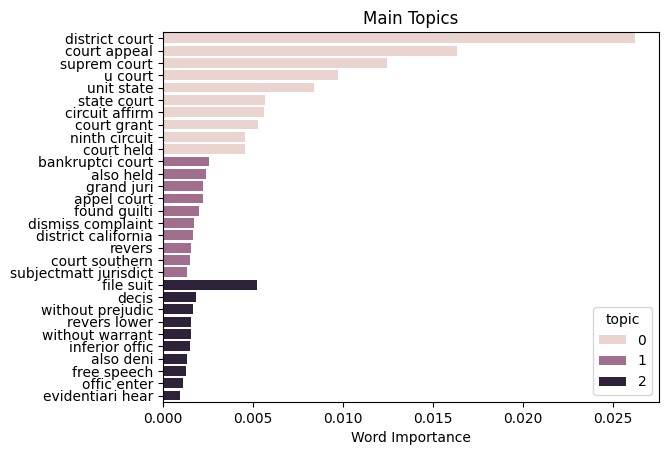

In [28]:
plot_barplots_lda(1)

Topic 0:
court state district claim feder act appeal case unit dismiss
Topic 1:
sentenc court convict trial juri death murder petit habea counsel
Topic 2:
offic search polic arrest warrant car evid suppress drug fourth
Topic 3:
school student educ parent public teacher district board child amend
Topic 4:
employe plan benefit employ union compani retir secur work act
Topic 5:
tax bankruptci court revenu refund exempt ir bank tribe commerc
Topic 6:
patent infring use damag court award product manufactur invalid feder


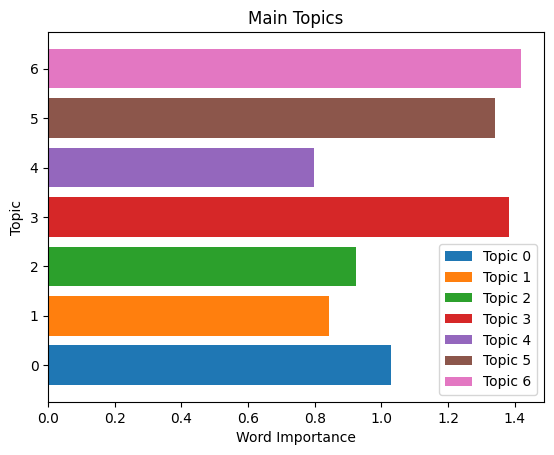

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

def plot_barplots_nmf(y):
    corpus = df_facts_target[df_facts_target["first_party_winner"]==y]["facts_clean"]
    
    # Vectorize the text data
    vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
    X = vectorizer.fit_transform(corpus)
    
    # Fit NMF model
    nmf_model = NMF(n_components=7, random_state=123)
    nmf_model.fit(X)
    
    # Extract topics and associated words
    feature_names = vectorizer.get_feature_names_out()
    n_top_words = 10  # Define the number of top words per topic
    topics = []
    for topic_idx, topic in enumerate(nmf_model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics.append({'topic': topic_idx, 'words': top_words})
    
    # Print topics and associated words
    for topic in topics:
        print(f"Topic {topic['topic']}:")
        print(" ".join(topic['words']))
    
    # Plot bar plots
    fig, ax = plt.subplots()
    for topic in topics:
        ax.barh(topic['topic'], nmf_model.components_[topic['topic']], label=f"Topic {topic['topic']}")
    ax.set_title('Main Topics')
    ax.set_ylabel('Topic')
    ax.set_xlabel('Word Importance')
    ax.legend()
    plt.show()

# Call the function
plot_barplots_nmf(1)


In [21]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

In [22]:
df_facts_target.columns

Index(['facts', 'facts_clean', 'first_party_winner'], dtype='object')

In [23]:
df_catRaw_facts_target=pd.concat([df_facts_target,df_cat],axis=1,join='inner')
df_catRaw_facts_target

,facts,facts_clean,first_party_winner,decision_type,disposition,issue_area
0,Joan Stanley had three children with Peter Sta...,joan stanley three child peter stanley stanley...,1,majority opinion,reversed/remanded,Civil Rights
1,John Giglio was convicted of passing forged mo...,john giglio convict pas forg money order appea...,1,majority opinion,reversed/remanded,Due Process
2,"The Idaho Probate Code specified that ""males m...",idaho probat code specifi male must prefer fem...,1,majority opinion,reversed/remanded,Civil Rights
3,"Miller, after conducting a mass mailing campai...",miller conduct mass mail campaign advertis sal...,1,majority opinion,vacated/remanded,First Amendment
4,Ernest E. Mandel was a Belgian professional jo...,ernest e mandel belgian profession journalist ...,1,majority opinion,reversed,First Amendment
...,...,...,...,...,...,...
3093,For over a century after the Alaska Purchase i...,centuri alaska purchas 1867 feder govern settl...,1,majority opinion,reversed/remanded,Civil Rights
3094,"Refugio Palomar-Santiago, a Mexican national, ...",refugio palomarsantiago mexican nation grant p...,1,majority opinion,reversed/remanded,Criminal Procedure
3095,Tarahrick Terry pleaded guilty to one count of...,tarahrick terri plead guilti one count posse i...,0,majority opinion,affirmed,Criminal Procedure
3096,Joshua James Cooley was parked in his pickup t...,joshua jame cooley park pickup truck side road...,1,majority opinion,vacated/remanded,Civil Rights


In [24]:
xFeatures = df_catRaw_facts_target[['facts_clean','decision_type','disposition', 'issue_area']]
yLabel = df_catRaw_facts_target['first_party_winner']

In [25]:
df_dec = pd.get_dummies(df_cat['decision_type'])
df_dec

,dismissal - improvidently granted,dismissal - moot,dismissal - other,equally divided,majority opinion,opinion of the court,per curiam,plurality opinion
0,False,False,False,False,True,False,False,False
1,False,False,False,False,True,False,False,False
2,False,False,False,False,True,False,False,False
3,False,False,False,False,True,False,False,False
4,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...
3093,False,False,False,False,True,False,False,False
3094,False,False,False,False,True,False,False,False
3095,False,False,False,False,True,False,False,False
3096,False,False,False,False,True,False,False,False


In [26]:
df_disp = pd.get_dummies(df_cat['disposition'])
df_disp

,affirmed,none,reversed,reversed in-part,reversed in-part/remanded,reversed/remanded,vacated,vacated in-part/remanded,vacated/remanded
0,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,True
4,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
3093,False,False,False,False,False,True,False,False,False
3094,False,False,False,False,False,True,False,False,False
3095,True,False,False,False,False,False,False,False,False
3096,False,False,False,False,False,False,False,False,True


In [27]:
df_area = pd.get_dummies(df_cat['issue_area'])
df_area

,Attorneys,Civil Rights,Criminal Procedure,Due Process,Economic Activity,Federal Taxation,Federalism,First Amendment,Interstate Relations,Judicial Power,Miscellaneous,Privacy,Private Action,Unions
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3093,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3094,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3095,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3096,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [28]:
df_dec_disp_area=pd.concat([df_dec,df_disp, df_area],axis=1,join='inner')
df_dec_disp_area

,dismissal - improvidently granted,dismissal - moot,dismissal - other,equally divided,majority opinion,opinion of the court,per curiam,plurality opinion,affirmed,none,...,Economic Activity,Federal Taxation,Federalism,First Amendment,Interstate Relations,Judicial Power,Miscellaneous,Privacy,Private Action,Unions
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3093,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3094,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3095,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3096,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
df_dec_disp_area_target=pd.concat([df_dec_disp_area,df_catRaw_facts_target['first_party_winner']],axis=1,join='inner')

In [30]:
vectorize=CountVectorizer()

In [31]:
df_catRaw_facts_target

,facts,facts_clean,first_party_winner,decision_type,disposition,issue_area
0,Joan Stanley had three children with Peter Sta...,joan stanley three child peter stanley stanley...,1,majority opinion,reversed/remanded,Civil Rights
1,John Giglio was convicted of passing forged mo...,john giglio convict pas forg money order appea...,1,majority opinion,reversed/remanded,Due Process
2,"The Idaho Probate Code specified that ""males m...",idaho probat code specifi male must prefer fem...,1,majority opinion,reversed/remanded,Civil Rights
3,"Miller, after conducting a mass mailing campai...",miller conduct mass mail campaign advertis sal...,1,majority opinion,vacated/remanded,First Amendment
4,Ernest E. Mandel was a Belgian professional jo...,ernest e mandel belgian profession journalist ...,1,majority opinion,reversed,First Amendment
...,...,...,...,...,...,...
3093,For over a century after the Alaska Purchase i...,centuri alaska purchas 1867 feder govern settl...,1,majority opinion,reversed/remanded,Civil Rights
3094,"Refugio Palomar-Santiago, a Mexican national, ...",refugio palomarsantiago mexican nation grant p...,1,majority opinion,reversed/remanded,Criminal Procedure
3095,Tarahrick Terry pleaded guilty to one count of...,tarahrick terri plead guilti one count posse i...,0,majority opinion,affirmed,Criminal Procedure
3096,Joshua James Cooley was parked in his pickup t...,joshua jame cooley park pickup truck side road...,1,majority opinion,vacated/remanded,Civil Rights


In [58]:
count_matrix = vectorize.fit_transform(df_catRaw_facts_target['facts_clean'])
count_array = count_matrix.toarray()
data_facts_vectorized = pd.DataFrame(data=count_array, columns=vectorize.get_feature_names_out())

In [59]:
data_final = pd.concat([data_facts_vectorized,df_dec_disp_area_target],axis=1,join='inner')
data_final.drop(columns=data_final.columns[-1],  axis=1,  inplace=True)
data_final=pd.concat([data_final,df_catRaw_facts_target['first_party_winner']],axis=1,join='inner')

In [60]:
data_final

,011119,0125,01657,019,02,036539,04,041352,041581,045323,...,Federal Taxation,Federalism,First Amendment,Interstate Relations,Judicial Power,Miscellaneous,Privacy,Private Action,Unions,first_party_winner
0,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,1
1,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,1
2,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,1
3,0,0,0,0,0,0,0,0,0,0,...,False,False,True,False,False,False,False,False,False,1
4,0,0,0,0,0,0,0,0,0,0,...,False,False,True,False,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3093,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,1
3094,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,1
3095,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,0
3096,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,1


In [61]:
X_train, X_test, y_train, y_test = train_test_split(data_final.drop(columns=['first_party_winner']),
                                                    data_final['first_party_winner'], 
                                                    test_size=0.2,random_state=42)


In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_final = scaler.fit_transform(data_final)

In [63]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=40, random_state=0)

In [64]:
lda_data_train = pd.DataFrame(data=lda.fit_transform(X_train))
lda_data_test = pd.DataFrame(data=lda.transform(X_test))

In [65]:
lda_data_test

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.000347,0.000347,0.000347,0.000347,0.000347,0.000347,0.000347,0.000347,0.000347,0.000347,...,0.000347,0.000347,0.000347,0.000347,0.000347,0.000347,0.000347,0.000347,0.000347,0.114458
1,0.120688,0.000236,0.000236,0.000236,0.105067,0.000236,0.069559,0.000236,0.000236,0.000236,...,0.000236,0.000236,0.143730,0.000236,0.000236,0.000236,0.000236,0.000236,0.000236,0.000236
2,0.000158,0.000158,0.000158,0.000158,0.000158,0.000158,0.000158,0.000158,0.000158,0.000158,...,0.000158,0.000158,0.000158,0.680856,0.000158,0.000158,0.000158,0.000158,0.000158,0.014814
3,0.000219,0.000219,0.086300,0.000219,0.126109,0.000219,0.000219,0.000219,0.226642,0.128478,...,0.000219,0.000219,0.143415,0.000219,0.019037,0.000219,0.000219,0.000219,0.000219,0.000219
4,0.000926,0.000926,0.247033,0.000926,0.000926,0.000926,0.000926,0.254399,0.000926,0.000926,...,0.000926,0.000926,0.000926,0.153884,0.000926,0.000926,0.000926,0.000926,0.000926,0.000926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,0.000610,0.000610,0.000610,0.000610,0.000610,0.000610,0.000610,0.000610,0.000610,0.000610,...,0.000610,0.000610,0.000610,0.000610,0.000610,0.120756,0.000610,0.000610,0.000610,0.000610
616,0.000281,0.000281,0.000281,0.000281,0.000281,0.000281,0.000281,0.000281,0.051892,0.100030,...,0.000281,0.000281,0.000281,0.000281,0.000281,0.000281,0.000281,0.000281,0.000281,0.000281
617,0.000278,0.000278,0.000278,0.000278,0.000278,0.000278,0.161421,0.000278,0.000278,0.000278,...,0.000278,0.000278,0.000278,0.127111,0.000278,0.000278,0.000278,0.000278,0.000278,0.000278
618,0.000121,0.000121,0.000121,0.007149,0.000121,0.000121,0.128341,0.048393,0.000121,0.000121,...,0.006968,0.000121,0.021372,0.000121,0.000121,0.000121,0.000121,0.000121,0.000121,0.000121


In [53]:
# Create the parameter grid based on the results of random search 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'max_depth': [8,10,12,14],
    'max_features': [60,70,80,90,100],
    'min_samples_leaf': [2, 3, 4],
    'n_estimators': [100, 200, 300]
}# Create a based model
rf = RandomForestClassifier()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [41]:
grid_search.fit(lda_data_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 180 candidates, totalling 540 fits


KeyboardInterrupt: 

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Assuming you've already imported RandomForestClassifier, lda_data_train, y_train, lda_data_test, y_test
rand = RandomForestClassifier(max_depth=8, max_features=70, min_samples_leaf=2, n_estimators=100)
rand.fit(lda_data_train, y_train)
y_pred = rand.predict(lda_data_test)

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)


Confusion Matrix:
[[  2 200]
 [  5 413]]
Accuracy: 0.6693548387096774
Precision: 0.54731583734899
Recall: 0.6693548387096774
F1 Score: 0.5463750752449644


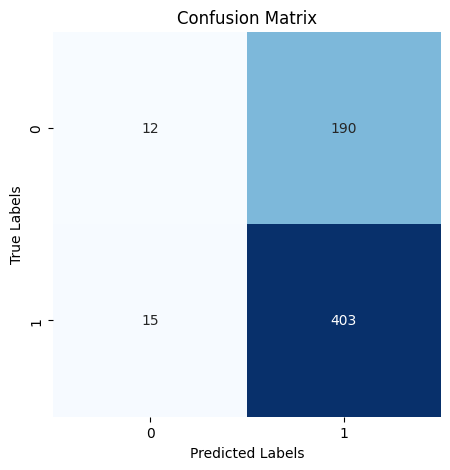

In [198]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already imported confusion_matrix, y_test, y_pred

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [169]:
rand=RandomForestClassifier(max_depth= 8, max_features = 70, min_samples_leaf = 2, n_estimators = 100)

In [170]:
rand.fit(lda_data_train,y_train)

RandomForestClassifier(max_depth=8, max_features=70, min_samples_leaf=2)

In [171]:
rand.score(lda_data_train,y_train)

0.7005649717514124

In [172]:
rand.score(lda_data_test,y_test)

0.6725806451612903

In [173]:
from sklearn.metrics import f1_score

In [174]:
y_pred1 = rand.predict(lda_data_test)
f1_score(y_test, y_pred1)

0.8027210884353742

In [175]:
model = XGBClassifier()
model.fit(lda_data_train, y_train)
y_pred = model.predict(lda_data_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
f1_score(y_test, y_pred1)

Accuracy: 60.48%


0.8027210884353742

In [177]:
knn=KNeighborsClassifier(n_neighbors=7)

In [178]:
knn.fit(lda_data_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [179]:
knn.score(lda_data_train,y_train)

0.7082324455205811

In [180]:
knn.score(lda_data_test,y_test)

0.6580645161290323

Confusion Matrix:
[[ 31 171]
 [ 41 377]]
Accuracy: 0.6580645161290323
Precision: 0.6040934123433536
Recall: 0.6580645161290323
F1 Score: 0.5999565154016889


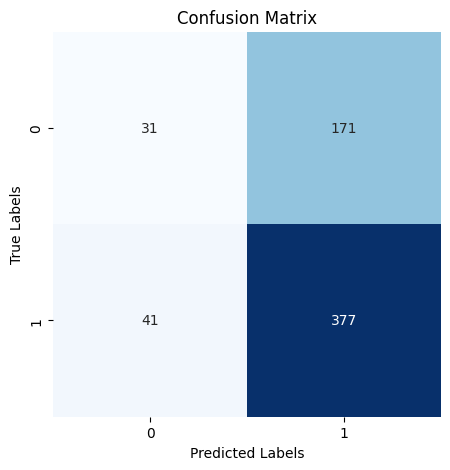

In [55]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Assuming you've already imported KNeighborsClassifier, lda_data_train, y_train, lda_data_test, y_test

# Create KNeighborsClassifier model
knn = KNeighborsClassifier(n_neighbors=22)

# Train the model
knn.fit(lda_data_train, y_train)

# Predict on test data
y_pred = knn.predict(lda_data_test)

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Plot confusion matrix as heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Confusion Matrix:
[[ 43 159]
 [ 86 332]]
Accuracy: 0.6048387096774194
Precision: 0.564472329895101
Recall: 0.6048387096774194
F1 Score: 0.5771308346115773


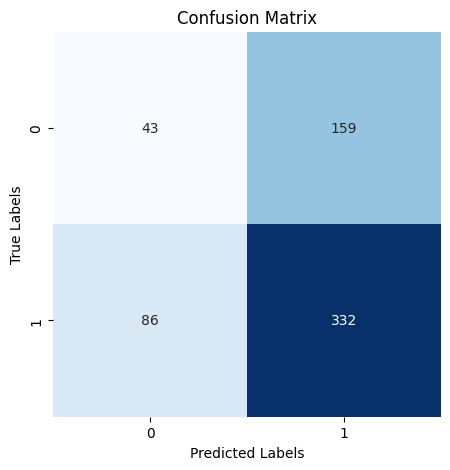

In [66]:
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Assuming you've already imported xgboost, lda_data_train, y_train, lda_data_test, y_test

# Create XGBoost model
xgb_model = xgb.XGBClassifier()

# Train the model
xgb_model.fit(lda_data_train, y_train)

# Predict on test data
y_pred = xgb_model.predict(lda_data_test)

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Plot confusion matrix as heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Confusion Matrix:
[[  1 201]
 [  0 418]]
Accuracy: 0.6758064516129032
Precision: 0.7810777007660639
Recall: 0.6758064516129032
F1 Score: 0.5467256404193728


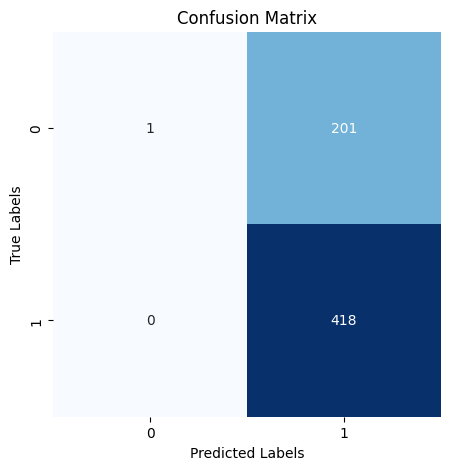

In [213]:
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Assuming you've already imported SVC, lda_data_train, y_train, lda_data_test, y_test

# Create SVC model
svm_model = SVC()

# Train the model
svm_model.fit(lda_data_train, y_train)

# Predict on test data
y_pred = svm_model.predict(lda_data_test)

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Plot confusion matrix as heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [214]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Assuming you've already imported KMeans, lda_data_train, lda_data_test

# Create KMeans clustering model
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to training data
kmeans.fit(lda_data_train)

# Predict clusters on test data
y_pred = kmeans.predict(lda_data_test)

# Silhouette Score
silhouette_avg = silhouette_score(lda_data_test, y_pred)
print("Silhouette Score:", silhouette_avg)

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(lda_data_test[:, 0], lda_data_test[:, 1], hue=y_pred, palette='Set1', legend='full')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


Silhouette Score: 0.04392346817748308


KeyError: (slice(None, None, None), 0)

<Figure size 800x600 with 0 Axes>